Step 2: Loading and preparing the data...
Data preparation complete.
------------------------------
Step 3: Splitting data and training the model...
Model training complete.
------------------------------
Step 4: Evaluating model performance...
Model Performance on Test Data:
R-squared (R2) Score: 0.88
Mean Absolute Error (MAE): $10,412.76
------------------------------
Step 5: Generating SHAP explanation plots...
Displaying overall feature importance (Bar Plot):


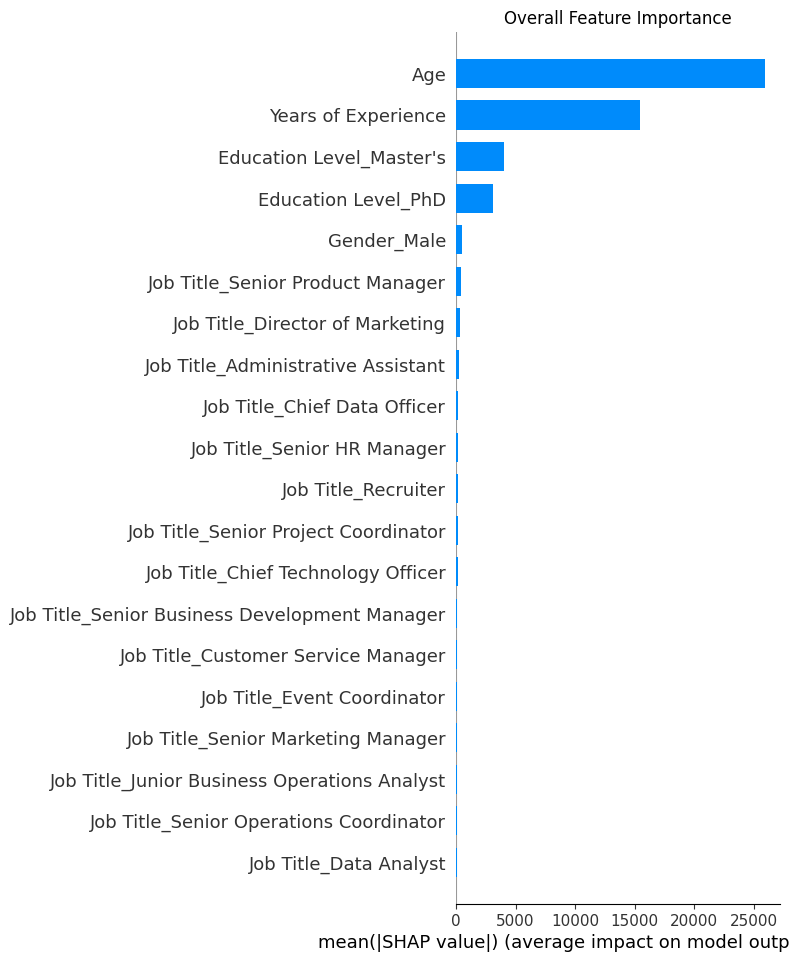

Displaying detailed feature impact (Beeswarm Plot):


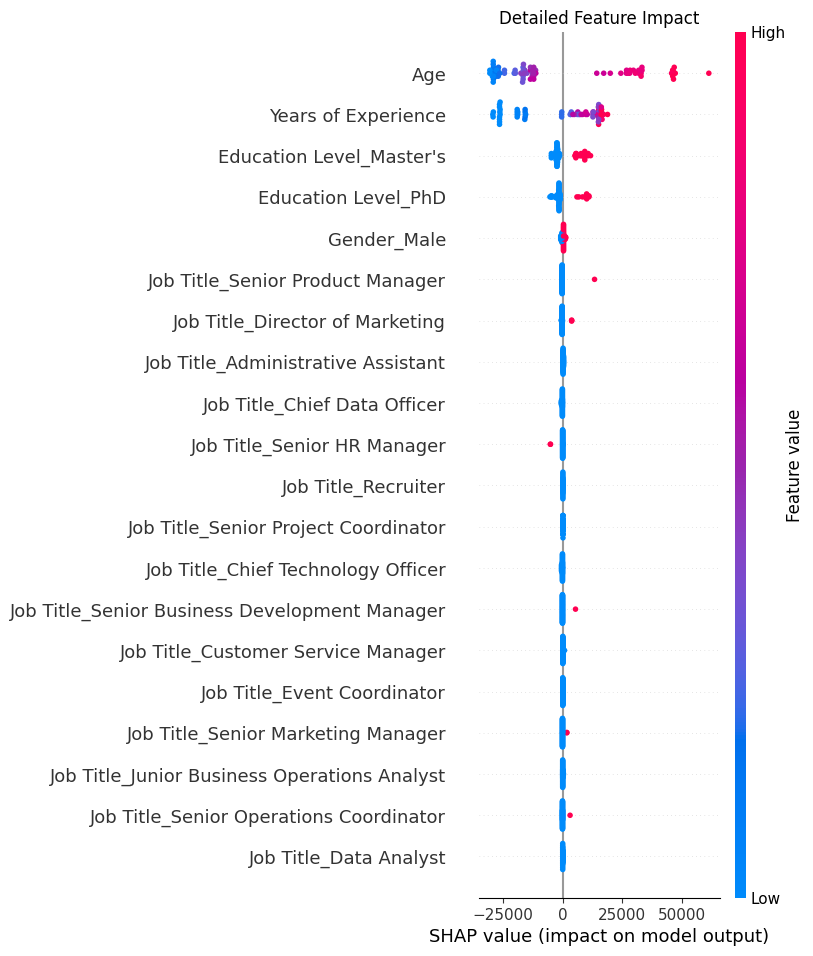

SHAP analysis complete.
------------------------------
Step 6: Saving the trained model and column names...
Model and columns have been saved successfully.
------------------------------
Script finished.


In [2]:
# Step 1: Import all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import shap
import joblib
import matplotlib.pyplot as plt

# --- DATA PREPARATION ---
print("Step 2: Loading and preparing the data...")
# Load the dataset from the CSV file
df = pd.read_csv('Salary Data.csv')

# Handle missing values by dropping any rows that have them
df.dropna(inplace=True)

# Separate the features (all columns except 'Salary') from the target ('Salary')
features = df.drop('Salary', axis=1)
target = df['Salary']

# Convert categorical text columns into a numerical format using one-hot encoding
# This creates new columns for each category (e.g., 'Job Title_Software Engineer')
X = pd.get_dummies(features, drop_first=True)
print("Data preparation complete.")
print("-" * 30)


# --- MODEL TRAINING ---
print("Step 3: Splitting data and training the model...")
# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Create an instance of the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)
print("Model training complete.")
print("-" * 30)


# --- MODEL EVALUATION ---
print("Step 4: Evaluating model performance...")
# Use the trained model to make predictions on the unseen test data
predictions = model.predict(X_test)

# Calculate the model's performance metrics
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Model Performance on Test Data:")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print("-" * 30)


# --- MODEL EXPLANATION (SHAP) ---
print("Step 5: Generating SHAP explanation plots...")
# Create a SHAP explainer object using the trained model
explainer = shap.TreeExplainer(model)

# Calculate the SHAP values for the test data to explain the predictions
shap_values = explainer.shap_values(X_test)

# Create and display Plot 1: A bar chart of overall feature importance
print("Displaying overall feature importance (Bar Plot):")
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Overall Feature Importance")
plt.show()


# Create and display Plot 2: A detailed summary plot showing the impact of each feature
print("Displaying detailed feature impact (Beeswarm Plot):")
shap.summary_plot(shap_values, X_test, show=False)
plt.title("Detailed Feature Impact")
plt.show()
print("SHAP analysis complete.")
print("-" * 30)


# --- SAVE ARTIFACTS ---
print("Step 6: Saving the trained model and column names...")
# Save the trained model to a file
joblib.dump(model, 'salary_model.pkl')

# Save the column names that the model was trained on
joblib.dump(X.columns, 'model_columns.pkl')

print("Model and columns have been saved successfully.")
print("-" * 30)
print("Script finished.")